In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [28]:
data = pd.read_csv("Campus Placement.csv")
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [29]:
data.rename(columns={'specialisation':'mba_t'}, inplace=True)

In [30]:
data['salary'].isna().sum()

67

In [31]:
data['salary'].fillna(0,inplace=True)

In [32]:
data['salary'].isna().sum()

0

In [33]:
def Outlier(data,feature):
    shape1 = data.shape[0]                                 #taking the shape before removing outliers to keep track of no of outliers
    #data[feature]=np.log(data[feature])                 #Applying log transformation
    lst = sorted(data[feature])                            #taking a list of sorted values of that column
    
    quantile1, quantile3 = np.percentile(lst,[25,75])         #obtaining 25th and 75th percentile
    iqr_value = quantile3 - quantile1                         #finding inter-quartile value(difference)
    
    #obtaining lower bound and upper bound
    lower_bound_val = quantile1 - (1.1 * iqr_value)
    upper_bound_val = quantile3 + (1.1 * iqr_value)
    
    data.drop(data[(data[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
    data.drop(data[(data[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value
    
    return shape1-(data.shape[0])

In [34]:
Outlier(data,'salary')

/var/folders/g1/d638mgzd55x43jm0gdgy84qc0000gn/T/ipykernel_3296/798147335.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(data[(data[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
/var/folders/g1/d638mgzd55x43jm0gdgy84qc0000gn/T/ipykernel_3296/798147335.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(data[(data[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value


3

<AxesSubplot:xlabel='etest_p', ylabel='salary'>

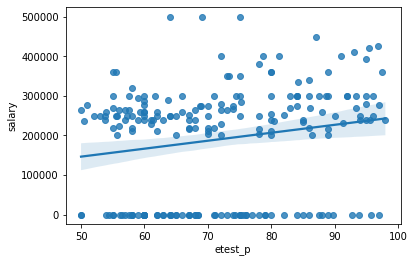

In [35]:
sns.regplot(x='etest_p',y='salary',data=data)

/Users/varun/DS/ds_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

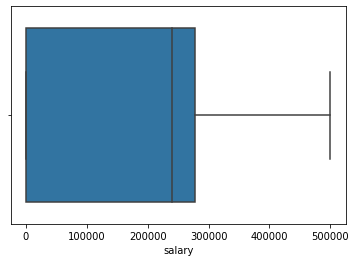

In [36]:
sns.boxplot(data.salary)

## Creating Dummies

In [37]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'mba_t', 'mba_p', 'status', 'salary'],
      dtype='object')

In [38]:
data_copy = data.copy()

cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t','status']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_copy[var], prefix=var)
    data1=data_copy.join(cat_list)
    data_copy = data1
    
cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t','status']
data_vars=data_copy.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [40]:
Encoded_data=data_copy[to_keep]
Encoded_data.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary', 'gender_F',
       'gender_M', 'ssc_b_Central', 'ssc_b_Others', 'hsc_b_Central',
       'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Comm&Mgmt', 'degree_t_Others', 'degree_t_Sci&Tech',
       'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin', 'mba_t_Mkt&HR',
       'status_Not Placed', 'status_Placed'],
      dtype='object')

In [41]:
Encoded_data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,mba_t_Mkt&Fin,mba_t_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,...,1,0,0,1,1,0,0,1,1,0
4,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
211,58.00,60.00,72.00,74.0,53.62,275000.0,0,1,0,1,...,1,0,0,1,1,0,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,295000.0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,1
213,74.00,66.00,58.00,70.0,60.23,204000.0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


In [42]:
y = Encoded_data['salary']
X = Encoded_data.drop(['salary'], axis = 1)

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 20, random_state = 42)

## LINEAR REGRESSION

In [54]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predicting the result
y_pred = linear_model.predict(X_test)

In [56]:
print(y_pred)

[228585.62712316  34928.48613667 -26090.57007729 -21618.28469717
 241040.45459555 291963.07900493 -14315.47151593 -24765.7439436
 -31083.3506848  -10267.60275295 323216.18147862 288090.39735036
  22054.00245983  -4850.79366934 262948.95627307 283850.6241109
  27373.86493781 -22891.30389136 273373.42658966 285694.17542779]


- **MEAN SQUARED ERROR**

In [59]:
MSE = mean_squared_error(y_test, y_pred)
MSE

1555060348.9924998

- **ROOT MEAN SQUARED ERROR**

In [60]:
RMSE = mean_squared_error(y_test, y_pred , squared = False)
RMSE

39434.25349860828

- **MEAN ABSOLUTE ERROR**

In [63]:
MAE = mean_absolute_error(y_test , y_pred)
MAE

32341.20376367634